![header](../header.png)

# Assignment 02 (30 points total)
<span style='color:red'> Due date: 18.05.2021 23:59</span>

This week's assignment is about Artificial Neural Networks. If anything is unlcear or if you find errors, feel free to post in the forum set up in Ilias or in the WebEx live session, or write an email to one of us.

_You can submit incomplete assignments that don't validate_. If a test cell validates correctly, you will get the points.

## A Simple Artificial Neural Network (20 points)
It makes sense to once in our lives program a simple ANN from scratch. For simplicity, the following neural network will be restricted to doing arbitrary logic gate approximations. It will also only consist of 3 layers; one input layer of arbitrary size, one hidden layer of arbitrary size, and an output layer of size 1. Additionally, the hidden layer will not have a bias unit to make computation even easier.

We'll start with the necessary functions:

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### activation function and its gradient ###

# implement the sigmoid function here
# omit the β or set it to 1
def sigmoid(z):
    ### BEGIN SOLUTION
    return 1/(1+np.exp(-z))
    ### END SOLUTION

# the gradient can be simplified (recall the form discussed in the lecture)
# the z that is given as input here will already be a sigmoid of something
# (like z=sigmoid(x)), so this can be further simplified
def grad_sigmoid(z):
    ### BEGIN SOLUTION
    return z*(1-z)
    ### END SOLUTION


### loss function and its gradient ###

# define the least squares loss function here, without any factors like 1/2N
def ls_loss(y, y_hat):
    ### BEGIN SOLUTION
    #return sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))
    return np.sum((y - y_hat)**2)
    ### END SOLUTION
    
# define the gradient of the least squares loss function from above
# with respect to y_hat here
def grad_ls_loss(y, y_hat):
    ### BEGIN SOLUTION
    return -2*(y-y_hat)
    ### END SOLUTION

In [88]:
assert np.isclose(sigmoid(0), 0.5)
assert sigmoid(1) == 0.5*np.tanh(0.5)+0.5


In [89]:
assert grad_sigmoid(0) == 0
assert grad_sigmoid(1) == 0
assert np.isclose(grad_sigmoid((1+np.sqrt(5))/2), -1)

In [90]:
assert ls_loss(1, 1) == 0
assert ls_loss(5.567, 3.567) == 4

In [91]:
assert grad_ls_loss(1,1) == 0
assert grad_ls_loss(5.567, 3.567) == -4

Next, we need the ANN itself. It's implemented as a class below. You need to finish the `__init__()` method by producing random weights, implement the feedforward, backpropagation, and a `predict()` method that returns the network's predictions for any given input. There are several possible ways to implement everything here.

In [83]:
### the artificial neural network class ###

class ANN:
    # inputs are: inputs X, ground truth y, number of neurons in hidden layer n2,
    # list of activations a, list of activation gradients g, loss function loss and its 
    # gradient g_loss
    def __init__(self, X, y, n2, a, g, loss, g_loss):
        # save the input examples in the network
        self.X  = X
        # also all ground truths
        self.y  = y
        
        # this is a fixed 3 layer network, so we need two weight matrices
        # these are initialized randomly. For this, you can use the 
        # function np.random.rand(). Set appropriate array sizes.
        # They should depend on the shape of X, and n2. Call the weights
        # "w1" and "w2". They should be attributes of this class.
        ### BEGIN SOLUTION
        self.w1 = np.random.rand(X.shape[1],n2)
        self.w2 = np.random.rand(n2,1)
        ### END SOLUTION
        
        # these are the activations used in the different layers
        self.a1 = a[0]
        self.a2 = a[1]
        # these are their respective gradients
        self.g1 = g[0]
        self.g2 = g[1]
        
        # this makes sure the desired loss function is used
        self.loss = loss
        # together with its corresponding gradient
        self.g_loss = g_loss
        
        # this empty list will be filled with the loss value in each iteration of gradient descent
        self.loss_hist = []
        
        # this array will save the statistical estimates for all input examples
        self.y_hat = np.zeros(y.shape)
        
        # when everything works, you can try the following weights. The first set of
        # weights gives a good starting point for gradient descent, the second set
        # give a bad starting point
        # the good ones:
        #self.w1 = np.array([[0.87726959 0.8389906 ], \
        #                    [0.95182991 0.02300285], \
        #                    [0.05977998 0.07032989]]
        #self.w2 = np.array([[0.82841218], \
        #                    [0.67521184]])
        # the bad ones:
        #self.w1 = np.array([[0.42370343 0.08948899], \
        #                    [0.21798266 0.75558149], \
        #                    [0.64117191 0.6628655 ]])
        #self.w2 = np.array([[0.18042524], \
        #                     [0.15431608]])
        

    def feedforward(self):
        # The feedforward here is a two-step process through the hidden...
        # Define an attribute self.l1out that contains the output of the hidden layer.
        # Since we're simultaneously calculating the outputs for ALL input examples, 
        # the linear combination is easier formulated as X times w1. Don't forget
        # to apply the correct activation function.
        ### BEGIN SOLUTION
        self.l1out = self.a1(self.X @ self.w1)
        ### END SOLUTION
        
        # ... and the last layer
        # Define an attribute self.y_hat, that saves the output of the last
        # layer. This is calculated the easiest way by doing the same thing
        # as above, but for the outputs of the hidden layer self.l1out
        # and the weights of the second layer.
        ### BEGIN SOLUTION
        self.y_hat = self.a2(self.l1out @ self.w2)
        ### END SOLUTION
        
        # afterwards, the current loss is appended to the loss_hist list
        self.loss_hist.append(self.loss(self.y, self.y_hat))

        
    def backpropagate(self):
        # Define the weight updates Δw2 and Δw1 here (in that order!).
        # Recall the form of the loss gradient for least squares loss. 
        # In vector format: n^(2).T @ (J'(y, y_hat) * a'^(2)(z^(3)))
        # what is n^(2) here? For simplicity of programming, instead of z^(i)
        # the sigmoid(z^(i)) is provided in this code. For example, self.y_hat
        # is the z^(3) in the formula given above.
        ### BEGIN SOLUTION
        Δw2 = self.l1out.T @ (self.g_loss(self.y, self.y_hat) * self.g2(self.y_hat))
        ### END SOLUTION
        
        # this needs a more convoluted chain rule. The form here is
        # n^(1).T @ ((J'(y, y_hat) * a^(2)'(z^(3)) @ w^(2).T) * a^(1)'(z^(2)))
        ### BEGIN SOLUTION
        Δw1 = self.X.T @  ((self.g_loss(self.y, self.y_hat) * self.g2(self.y_hat) @ self.w2.T) * self.g1(self.l1out))
        ### END SOLUTION

        # learning rate applied here larger than 1, to be able to leave 
        # bad local minima
        α = 1.2
        # update weights
        self.w1 -= α * Δw1
        self.w2 -= α * Δw2
        
        self.convergence_criterion = [np.linalg.norm(Δw1), np.linalg.norm(Δw2)]
    
    
    def train(self, max_iterations, ε):
        for i in range(max_iterations):
            self.feedforward()
            self.backpropagate()
            if abs(self.loss_hist[-1]) < ε:
                print("Backpropagation converged after", i, " steps.")
                break
        print("Finished training with final loss J =", self.loss_hist[-1])
        
        
    def predict(self, x):
        # this does basically the same as the feedforward, but with externally
        # given x. Return y_hat(x).
        ### BEGIN SOLUTION
        return self.a2(self.a1(x @ self.w1) @ self.w2)
        ### END SOLUTION
    
    
    def plot_loss(self):
        plt.cla()
        plt.yscale("log")
        plt.xlabel("Iteration", fontsize=16)
        plt.ylabel("J", fontsize=16)
        plt.plot([i for i in range(len(self.loss_hist))], self.loss_hist, lw=4)

Let's set up a test problem trying to learn $\text{XOR}$ to see if and how this works:

Finished training with final loss J = [0.10088535]

Statistical estimates produced by the ANN: 
 [[0.02936279]
 [0.97843826]
 [0.97843827]
 [0.02711331]]

Predictions for some input combinations:
x_1	x_2	output	prediction
0	1	0.978	1.0


Multiple predictions at once:
x_1	x_2	output	prediction
0	1	0.98	1.0
1	0	0.98	1.0


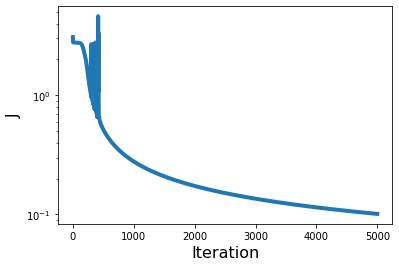

In [86]:
# inputs  bias, x_1, x_2
X = np.array([[1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
# results of xor(x_1, x_2)
y_xor = np.array([[0],[1],[1],[0]])
# also works with other logic gates, e.g.
#y_or = np.array([[0], [1], [1], [1]])

# create a neural network object
ann = ANN(X, y_xor, 2,\
         [sigmoid,sigmoid], \
         [grad_sigmoid, grad_sigmoid],\
          ls_loss, grad_ls_loss)

# do the backpropagation
ann.train(5000, 1e-1)

# print the final statistical estimate for each possible input
print("\nStatistical estimates produced by the ANN: \n", ann.y_hat)

# plot the training loss curve
ann.plot_loss()

print("\nPredictions for some input combinations:")
# do a prediction for some combination of bits (not forgetting the bias)
test_data = np.array([1, 0, 1])
pred = ann.predict(test_data)
print("x_1\tx_2\toutput\tprediction")
print(f"{test_data[1]}\t{test_data[2]}\t{round(pred[0],3)}\t{round(pred[0],0)}")
    
# you can also predict for several inputs at once
print("\n\nMultiple predictions at once:")
test_data = np.array([[1, 0, 1],[1, 1, 0]])
preds = ann.predict(test_data)
print("x_1\tx_2\toutput\tprediction")
#print(preds)
for i,pred in enumerate(preds):
    print(f"{test_data[i,1]}\t{test_data[i,2]}\t{round(*pred,2)}\t{round(*pred,0)}")

The optimization often gets stuck in local minima. When your loss is something around $5\cdot 10^{-1}$, it's very likely not predicting correctly. Try to reach a loss of around $1\cdot 10^{-1}$ for $\text{XOR}$. When you do reach such a minimum, the loss plot will show (sometimes violently) oscillating behavior around a loss of $5\cdot 10^{-1}$. This is where the optimization fights the local minima.

We used a least squares loss here just for ease of implementation, but it's not much more difficult to change this to BCE loss. It won't make this simple ANN's predictions any better, but it's a good exercise to try this for yourself and see what happens. You can also try implementing a bias for the hidden layer.

In [92]:
testX = np.array([[1,0,0,0],
              [1,0,1,0],
              [1,1,0,1],
              [1,1,1,1]])

testy_xor = np.array([[0],[1],[1],[0]])

testann = ANN(testX, testy_xor, 4,\
             [sigmoid,sigmoid], \
             [grad_sigmoid, grad_sigmoid],\
              ls_loss, grad_ls_loss)

assert testann.w1.shape == (4, 4)
assert testann.w2.shape == (4, 1)

In [93]:
testann.feedforward()


In [95]:
testw2 = testann.w2.copy()



In [96]:
testw1 = testann.w1.copy()



In [97]:
testx = np.array([[1, 0, 0, 0]])
testann.train(10, 1e-3)
testpred = testann.predict(testx)


Finished training with final loss J = 0.996754382018375


Gradient descent can often get stuck in local minima here, so if the algorithm needs the full 5000 iterations, it probably performs poorly. This shows that the loss landscape is extremely non-convex and difficult to traverse for good minima. Gradient descent on its own doesn't perform very well here.

On good runs, the algorithm should converge after around 500 steps and you will see some spikes in the loss graph, indicating where gradient descent hit suboptimal local minima, but was able to leave them again. This also happens in larger neural networks, even with better training algorithms, regularization and good libraries, albeit much more rarely. The lesson here is that a single training run does not tell you anything about the stability of your approach. You need to do several runs to show that you can achieve a good optimum consistently. There is a huge replicability crisis in papers regarding deep learning applications right now, because too often, people publish models that they got once in 100 or so training runs. These are difficult if not impossible to replicate, especially if you used exotic or expensive hardware. A good approach would be to do at least 10 training runs, then plot the training and validation losses as the mean of all runs and their standard deviation as shaded areas around the curves. We'll see this later in the course.

---

## ANN using Keras (10 points)
It's much easier using a package for creating and using a neural network. *Keras* was developed as a high-level API that supports multiple backends. Recently, it was incorporated into the *TensorFlow* framework from Google. Roughly, the pipeline for an ANN project is

* Define the model.
* Compile the model.
* Fit the model.
* Evaluate the model.
* Make predictions.

and works like this in Keras:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
Result of 0,1 :  [[0.93305]]
Full predictions: 
 [[0.10376337]
 [0.93305   ]
 [0.894801  ]
 [0.10501057]]


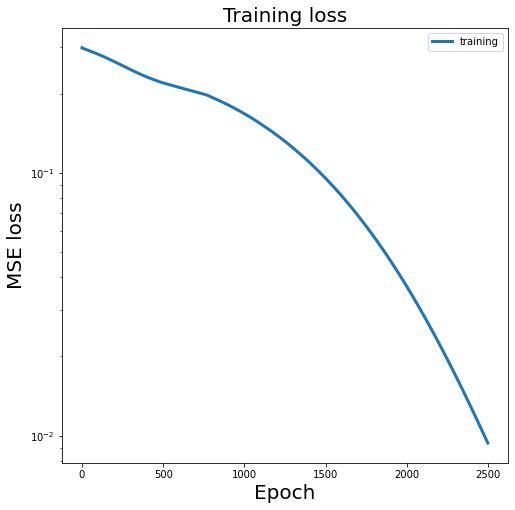

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# keras is part of TensorFlow, so importing things is done via tensorflow
# Sequential is used for creating sequential models, that are built layer
# by layer as seen below
from tensorflow.keras import Sequential
# actions in such a model are created by adding layers to a model. Dense
# layers are normal neural layers which we've seen in the lecture
from tensorflow.keras.layers import Dense
# the following function clears a keras session, such that all old models
# get deleted
from tensorflow.keras.backend import clear_session

clear_session()

### prepare dataset ###

# in contrast to the example above, the bias is introduced
# by keras, so we don't need to worry about it anymore.
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y_xor = np.array([[0],[1],[1],[0]])


### model definition ###

# this line instantiates an object from the Sequential class
model = Sequential()
# layers are added using the add() method from the Sequential class
# Dense adds a fully connected layer of neurons. Activation is given
# for all neurons simultaneously, although there are other options.
# input_shape in the first layer determines the shape that is 
# expected from the input array.
# One hidden layer with 2 neurons, activation relu works a bit better
# than sigmoid.
model.add(Dense(2, activation='relu', input_shape=(X.shape[1],)))
# Output layer with a single neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))


### model compilation ###

# this creates the actual model using the description given above.
# you can try different optimizers here, but from experience, adam
# seems to perform really well. Feel free to try the ones we discussed 
# as gradient descent variants in the last lecture.
# Additionally, different loss functions can be provided.
# Check the keras documentation to find out which ones are possible.
# To find it, you can simply google "keras loss" for example.
# It's also possible to define your own loss function.
model.compile(optimizer='rmsprop', loss='mse')


### model training ###

# In the network in the first part of this assignment, backpropagation
# fed all example inputs at once through the network. This is called an
# "epoch". So in one epoch, each training example is fed to the network.
# If you delete the verbose=0 statement, you will get a lengthy 
# progress bar with loads of information.
history = model.fit(X, y_xor, epochs=2500, verbose=0)

# this prints the architecture, size, and parameters of the model
print(model.summary())


### plot training loss ###

plt.figure(figsize=(8,8))

plt.plot(history.history['loss'], lw=3)
plt.yscale('log')
plt.title('Training loss', fontsize=20)
plt.ylabel('MSE loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['training'], loc='upper right')


### predict something ###

print("Result of 0,1 : ", model.predict(np.array([[0, 1]])))
print("Full predictions: \n", model.predict(X))

You will see that often this performs just as badly as the simple network above and training takes just as long. The reason is that this kind of problem is not really something you would solve using a neural network, and solving it statistically would work a bit better with more neurons. The loss landscape is highly non-convex. Let's instead try something more sophisticated and interesting.

Recall the MNIST example dataset from the lecture, and fill the gaps in the following code:

5 => tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)
Epoch 1/5
657/657 [==============================] - 3s 4ms/step - loss: 12.6975 - val_loss: 1.0821
Epoch 2/5
657/657 [==============================] - 2s 3ms/step - loss: 0.6925 - val_loss: 0.6786
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 0.3522 - val_loss: 0.5604
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 0.2197 - val_loss: 0.5326
Epoch 5/5
657/657 [==============================] - 2s 3ms/step - loss: 0.2125 - val_loss: 0.5901
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
______

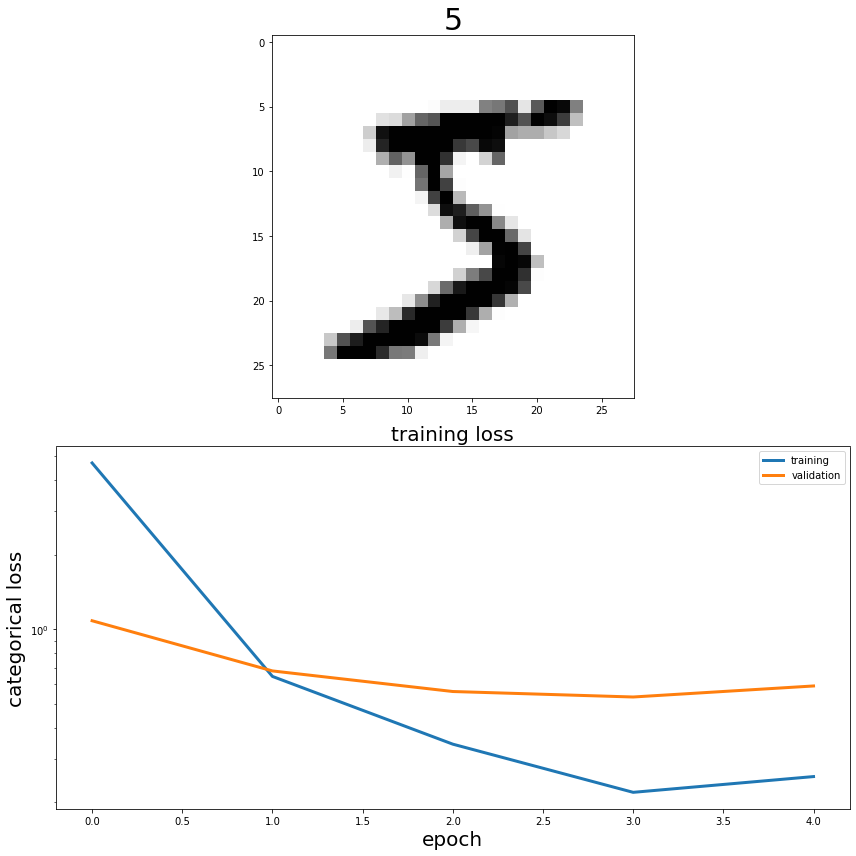

R^2 score on test set =  tf.Tensor(0.890292, shape=(), dtype=float32)


In [4]:
# keras is part of TensorFlow, so importing things is done via tensorflow
# Sequential is used for creating sequential models, that are built layer
# by layer as seen below (or feed-forward models)
from tensorflow.keras import Sequential
# actions in such a model are created by adding layers to a model. Dense
# layers are fully-connected neural layers which we've seen in the lecture
from tensorflow.keras.layers import Dense
# this automatically encodes output labels as one-hot vectors
from tensorflow.keras.backend import one_hot
# the following is only needed for calculating the R^2 score
from tensorflow.keras import backend as K
# clear_session() deletes stale models form memory
from tensorflow.keras.backend import clear_session

# it's a good idea to put this in the beginning of a cell that
# compiles a model
clear_session()


# we have to define th R² manually for now
def r_square(y, y_hat):
    SS_res =  K.sum(K.square(y - y_hat)) 
    SS_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


### prepare dataset ###

# allow_pickle here is needed because of a current bug,
# astype(np.float) loads the data as floats instead of as strings
try:
    y_MNIST
# only load this if X isn't already loaded, to save computation time
except NameError:
    X_MNIST = np.load("/data/X.npy", allow_pickle=True).astype(np.float)
    y_MNIST = np.load("/data/y.npy", allow_pickle=True).astype(np.int)

# plot an example to see that it worked
fig, ax = plt.subplots(2,1,figsize=(12,12))
ax = ax.flatten()

image = X_MNIST[0].reshape(28, 28)
ax[0].imshow(image, cmap='gray_r')
ax[0].set_title(y_MNIST[0], fontsize=30)


### produce one-hot encoding ###

# there is an inbuilt function for this, 10 is the number of categories
# read the documentation on the one_hot function from keras and use it
# to create a one-hot encoded array of the classes in y_MNIST called y_oh.
### BEGIN SOLUTION
y_oh = one_hot(y_MNIST, 10)
### END SOLUTION
# this shows what happened with one_hot
print(y_MNIST[0], "=>", y_oh[0])


### separate training and test examples ###

# validation is done automatically by keras
test_split = 56000        # this is 80% of the full set

# the zeros and 70001 could be omitted here, but make the process
# a bit more clear hopefully
X_train = X_MNIST[0:test_split]
X_test  = X_MNIST[test_split:70001]
# use the same idea for creating the correct y_train and y_test arrays
### BEGIN SOLUTION
y_train = y_oh[0:test_split]
y_test  = y_oh[test_split:70001]
### END SOLUTION


### model definition ###

# this line instantiates an object from the Sequential class
model = Sequential()
# One hidden layer with 400 neurons and relu activation:
# Don't forget to supply the input_shape
### BEGIN SOLUTION
model.add(Dense(400, activation='relu', input_shape=(X_train.shape[1],)))
### END SOLUTION
# Output layer with 10 neurons, 1 for each class. Softmax activation for getting probabilities
### BEGIN SOLUTION
model.add(Dense(10, activation='softmax'))
### END SOLUTION


### model compilation ###

# Compile the model using the 'adam' optimizer, or some other choice 
# Check the keras documentation on loss functions and choose an appropriate(!)
# loss function here.
### BEGIN SOLUTION
model.compile(optimizer='adam', loss='categorical_crossentropy')
### END SOLUTION


### model training ###

# "history" will contain the loss and validation loss information. Here,
# a validation_split of 0.25 is chosen, so that 20% of the original data
# will be used for validation. Recall that in the last two exercises, all
# examples from the training set were provided to the network at once.
# The batch_size given here limits that number to 64. Without a batch_size,
# keras will show each training example to the network one by one, which will
# take a long time. Choosing a batch_size different from 1 will also cause 
# some kind of "averaging" over the provided examples. More on that later.
# This takes a long time, please do not exceed using 25 epochs.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=5, batch_size=64)

# this prints the size and parameters of the model
print(model.summary())
# print all available plot options (history.history is a python dict)
print(history.history.keys())


### plot losses ###

ax[1].plot(history.history['loss'], lw=3)
ax[1].plot(history.history['val_loss'], lw=3)
ax[1].set_yscale('log')
ax[1].set_title('training loss', fontsize=20)
ax[1].set_ylabel('categorical loss', fontsize=20)
ax[1].set_xlabel('epoch', fontsize=20)
ax[1].legend(['training', 'validation'], loc='upper right')

plt.tight_layout()
plt.show()


### predict on the test set ###

# do the prediction for the whole test set and save the result in a 
# variable called y_hat_test
### BEGIN SOLUTION
y_hat_test = model.predict(X_test)
### END SOLUTION

# evaluate R^2 score on the test set
print("R^2 score on test set = ", r_square(y_test, y_hat_test))

In [5]:
assert y_oh[4].numpy()[9] == 1
assert y_oh[4].numpy()[0] == 0


In [6]:
assert y_train.shape == (56000, 10)
assert y_test.shape == (14000, 10)

In [7]:
assert model.layers[0].input.shape[1] == 784
assert model.layers[1].input.shape[1] == 400
assert model.layers[0].output.shape[1] == 400
assert model.layers[1].output.shape[1] == 10
assert "relu" in str(model.layers[0].activation)
assert "softmax" in str(model.layers[1].activation)

In [8]:
optstr = str(model.optimizer)
assert    "adam" in optstr or \
       "rmsprop" in optstr or \
       "adagrad" in optstr or \
         "nadam" in optstr



What kind of problem can you identify in the loss plot? How could you mitigate that problem?

To check a few example predictions, execute the following cell. Execution takes a little while. The number on top of the images is what the network thinks the image represents.

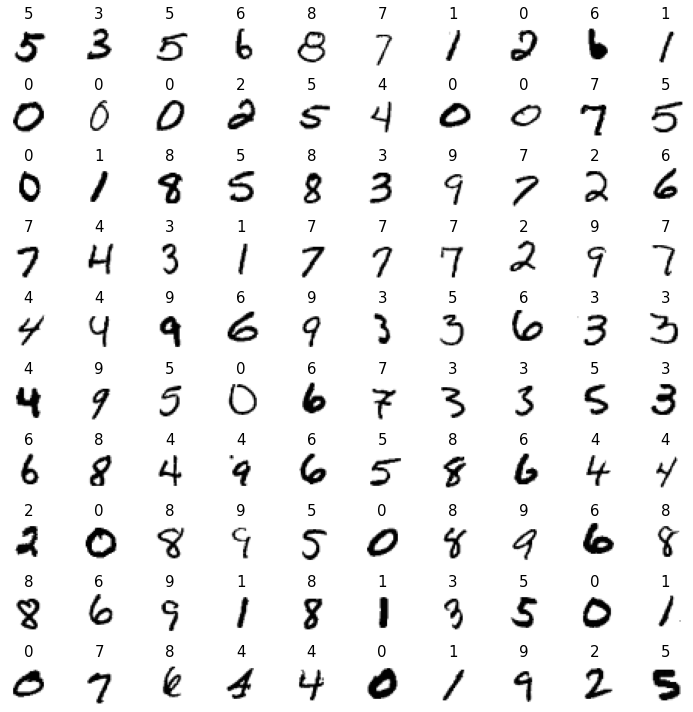

In [113]:
#from random import randint
import random
fig, ax = plt.subplots(10,10,figsize=(10,10))
ax = ax.flatten()

for i in range(100):
    r = random.randint(0, X_test.shape[0])
    image = X_test[r].reshape(28, 28)
    ax[i].imshow(image, cmap='gray_r')
    ax[i].set_title(np.argmax(y_hat_test[r]), fontsize=15)
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

There should be quite a few incorrectly classified test set examples, but generally, much more than 90% should be correct.

What did the network actually learn? We can plot the weights in the layers to see what has been going on during training:

(400, 784)
(10, 400)


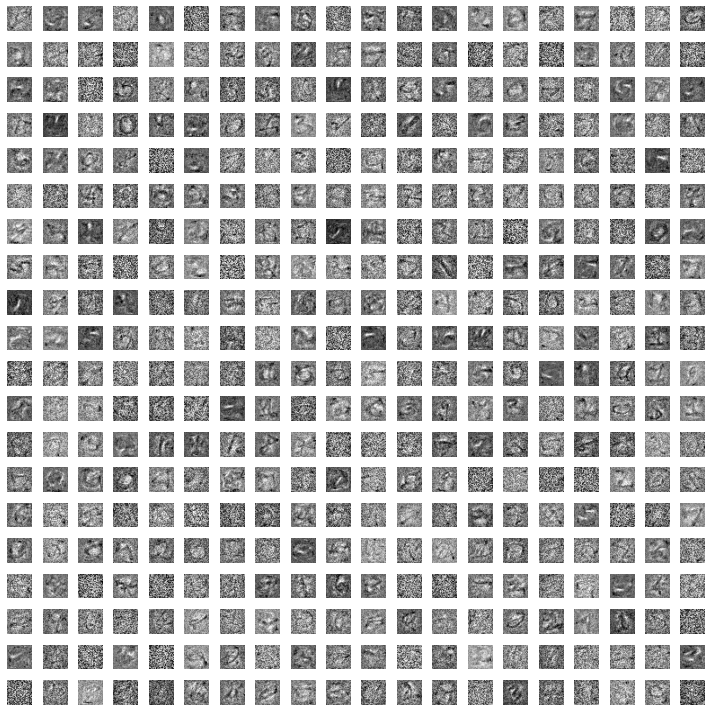

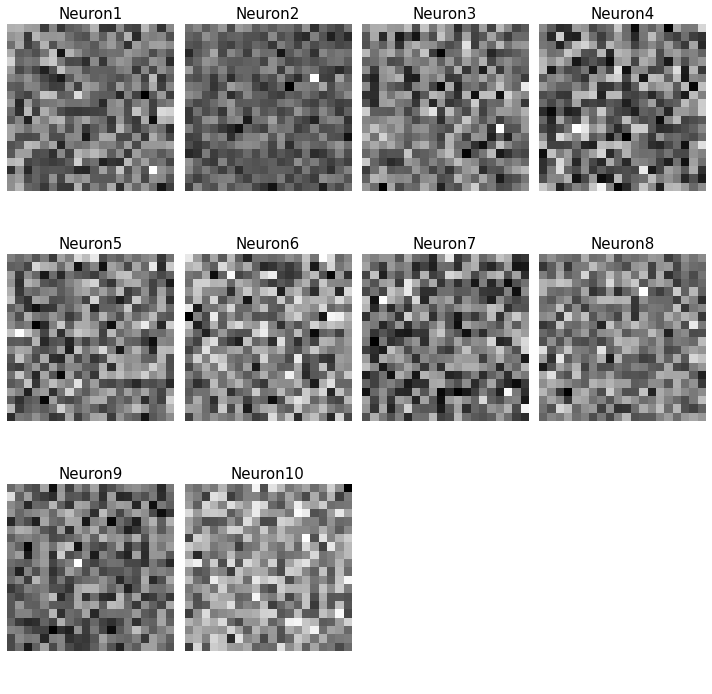

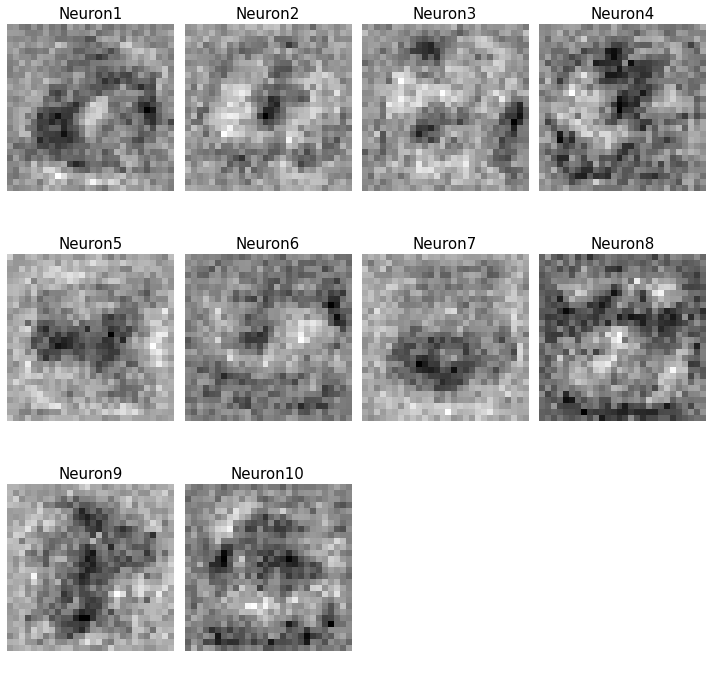

In [114]:
# to get the weights, the following method can be used
# the last [0] gets the weights. Element [1] containes
# the biases
l0 = model.layers[0].get_weights()[0].T
l1 = model.layers[1].get_weights()[0].T
l3 = l1 @ l0

print(l0.shape)
print(l1.shape)


### plot the weights in the first layer ###

# this will visualize the filters learned by the network, that it 
# will apply to the input images
fig, ax = plt.subplots(20,20,figsize=(10,10))
ax = ax.flatten()

for i in range(400):
    image = l0[i].reshape(28, 28)
    ax[i].imshow(image, cmap='gray_r')
    #ax[i].set_title("Neuron"+str(i+1), fontsize=15)
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()


### plot the weights in the second layer

# this will plot what the network deems important in the output
# coming from the hidden layer
fig, ax = plt.subplots(3,4,figsize=(10,10))
ax = ax.flatten()

for i in range(10):
    image = l1[i].reshape(20, 20)
    ax[i].imshow(image, cmap='gray_r')
    ax[i].set_title("Neuron"+str(i+1), fontsize=15)
    ax[i].axis('off')
ax[10].axis('off')
ax[11].axis('off')

plt.tight_layout()
plt.show()


### plot filter of the complete network on input data ###

# this will show the areas that the networks thinks are important
# in the input images
fig, ax = plt.subplots(3,4,figsize=(10,10))
ax = ax.flatten()

for i in range(10):
    image = l3[i].reshape(28, 28)
    ax[i].imshow(image, cmap='gray_r')
    ax[i].set_title("Neuron"+str(i+1), fontsize=15)
    ax[i].axis('off')
ax[10].axis('off')
ax[11].axis('off')

plt.tight_layout()
plt.show()

The first series of images are *filters* learned by the network, that it applies to the input images. The neurons in the hidden layer act according to how well the image fits these filters. The top left image for example represents what the first neuron in the hidden layer expects. If exactly this image is input, it will output a very large value. If it is fed the opposite, it will output a very small value.<br />
You can also see that when network complexity is too large, all input images will simply be saved in this layer. So using 70000 neurons in the hidden layer should suffice to get a training error of 0 and see all the input images in this graph.

The second series of images represents what the output layer expects from the hidden layer. So for example the top left image is what the first neuron in the output layer expects in order to maximize output. Each pixel in this image represents an output value between $0$ and $1$ from the corresponding neuron in the hidden layer.

If you squint your eyes a bit (depending on how well the training went and how many epochs were used you have to squint *a lot*), you might see that the last series of images kind of represents handwritten digits. In a sense, this is what the network thinks are the numbers $0, \dots, 9$. These will become a lot more obvious with more training.

So the network learns a **representation** of each category and tests incoming images against these representations. Depending on how much the neurons in the hidden layer fire.

---

## *optional*: Multiplication (0 points)
(You don't have to do anything here, but the implication of this is important)<br />
Letting a network learn to multiply can give an explanation for why and how artificial neural networks are able to approximate any polynomial, and also for why function classes invariant under concatenation are so special for machine learning.

In the following code, let a neural network learn multiplication of small numbers.

[[0.11439417 0.1838647 ]
 [0.09850764 0.20662161]
 [0.39237463 0.22263828]
 ...
 [0.10940929 0.0539928 ]
 [0.18056981 0.2154291 ]
 [0.31952609 0.13344076]]
[0.11439417 0.1838647 ] => [0.02103305] = 0.02103304978286043
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0082 - val_loss: 4.6480e-04
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 4.7028e-04 - val_loss: 4.3615e-04
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 4.4633e-04

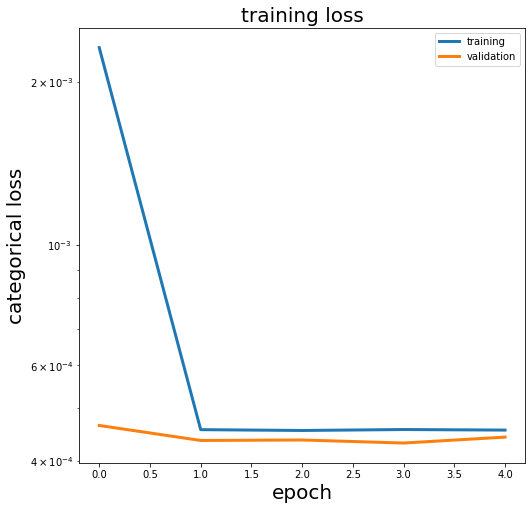

0.3 * 0.2 =  [[0.05954437]]
0.2 * 0.3 =  [[0.05949134]]
0.5 * 0.1 =  [[0.0839711]]
[array([[ 0.8903754 , -0.02522112,  0.5384058 ,  0.1267761 ],
       [ 0.3296696 , -0.96927667, -0.54496145, -0.1665296 ]],
      dtype=float32), array([-0.11865257,  0.08997457, -0.05941764,  0.08060143], dtype=float32)]
[array([[ 1.0258838 ],
       [-0.7464908 ],
       [ 0.21628177],
       [-0.34802705]], dtype=float32), array([-0.08204065], dtype=float32)]


In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.backend import one_hot
from tensorflow.keras import backend as kback
from tensorflow.keras.backend import clear_session

clear_session()

# we have to define this ourselves for now
def r_square(y, y_hat):
    SS_res =  kback.sum(kback.square(y - y_hat)) 
    SS_tot = kback.sum(kback.square(y - kback.mean(y))) 
    return ( 1 - SS_res/(SS_tot + kback.epsilon()) )


### prepare dataset ###

X_multi = np.random.default_rng().uniform(0,0.5,20000).reshape(-1, 2)
y_multi = np.array([[inp[0] * inp[1]] for inp in X_multi])
print(X_multi)

# check that it worked
print(X_multi[0], "=>", y_multi[0], "=", X_multi[0][0] * X_multi[0][1])


### separate training and test examples ###

# validation is done automatically by keras
test_split = 8000        # this is 80% of the full set

X_train = X_multi[:test_split]
X_test  = X_multi[test_split:]
y_train = y_multi[:test_split]
y_test  = y_multi[test_split:]


### model definition ###

model = Sequential()
model.add(Dense(4, activation='sigmoid', input_shape=(X_train.shape[1],))) #LeakyReLU(alpha=0.1)
model.add(Dense(1, activation='linear'))


### model compilation ###

model.compile(optimizer='adam', loss='mse')

print(model.summary())


### model training ###

history = model.fit(X_train, y_train, validation_split=0.25, epochs=5, batch_size=4, verbose=1)


### plot losses ###

plt.figure(figsize=(8,8))

plt.plot(history.history['loss'], lw=3)
plt.plot(history.history['val_loss'], lw=3)
plt.yscale('log')
plt.title('training loss', fontsize=20)
plt.ylabel('categorical loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['training', 'validation'], loc='upper right')

plt.show()


### predict on the test set ###
y_hat_test = model.predict(X_test)

# evaluate R^2 score on the test set
#print("R^2 score on test set = ", r_square(y_test, y_hat_test))

# check a few values
print("0.3 * 0.2 = ", model.predict([[0.3, 0.2]]))
print("0.2 * 0.3 = ", model.predict([[0.2, 0.3]]))
print("0.5 * 0.1 = ", model.predict([[0.5, 0.1]]))

# print weights
print(model.layers[0].get_weights())
print(model.layers[1].get_weights())

This only works rarely in such a minimal configuration, because the loss landscape is really suboptimal. Assume that it worked and gave out the theoretically ideal weights here. They should follow a certain form. The weights in the first layer should be $\lambda, -\lambda, \lambda, -\lambda$ for some constant $\lambda$, while the weights in the second layer should be $\mu, \mu, -\mu, -\mu$, where $\mu = \frac{1}{8\lambda^2\sigma^{\prime\prime}(0)}$ (in a limiting sense). 

Putting this together with the sigmoid activation, the result of the network should be 

\begin{align}
  \text{m}(u, v) &= \frac{\sigma(u+v) + \sigma(-u-v) - \sigma(u-v) - \sigma(-u+v)}{8\sigma^{\prime\prime}(0)} \\
                 &\approx uv(1 + \mathcal{O}(u^2 + v^2))
\end{align}


where the last line was determined by the *Taylor expansion* up to order 1. So it is analytically clear why the network returns good results for small input numbers, but does not generalize well for larger numbers, especially those which weren't included in the test set. In very large networks, *small numbers* roughly means those numbers that the network has seen in the training set, which determines the *radius of convergence*. Here, the network learns a combination of activation functions, that yields the desired outcome as a first order approximation of the combination of activation functions.

How does this explain which kind of functions a neural network can approximate? Note how the network now learned multiplication with a finite set of neurons and layers. Addition in a neural network is trivial (just add the outputs of two neurons). *Concatenating* these two operations sufficiently many times will be able to reproduce any polynomial to any desired degree of precision. Since *any* analytical function can be represented by a Taylor polynomial, neural networks are capable of approximating *any* analytical function arbitrarily well. In fact, the functions only have to be piecewise analytical. This is roughly what the **universal approximation theorem** states.<br />
Think about what kind of function classes are invariant under concatenation. Concatenating linear functions will again yield a linear function. Concatenating polynomials will yield a polynomial again. By extension, any concatenation of analytical functions will again yield an analytical function. Concatenating piecewise linear function will again yield piecewise linear functions.